In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA


In [46]:
iris=load_iris()
df=iris.data

In [48]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


In [50]:
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters for this example
kmeans.fit(X_scaled)

C:\Users\indum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [52]:
print("Number of rows in df:", len(df))
print("Number of labels in kmeans.labels_:", len(kmeans.labels_))

Number of rows in df: 150
Number of labels in kmeans.labels_: 150


In [60]:
df=pd.DataFrame(df)
df.reset_index(drop=True, inplace=True)
df['Cluster'] = kmeans.labels_

In [62]:
cluster_summary = df.groupby('Cluster').mean()  
print(cluster_summary)

                0         1         2         3
Cluster                                        
0        6.314583  2.895833  4.973958  1.703125
1        5.169697  3.630303  1.493939  0.272727
2        4.747619  2.895238  1.757143  0.352381


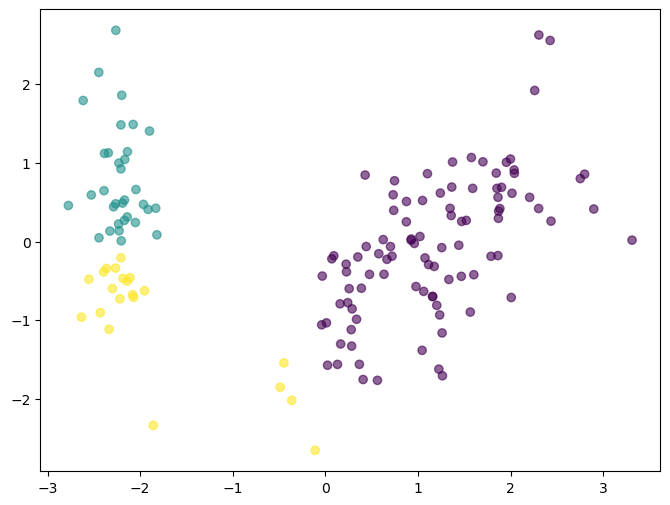

In [64]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6)

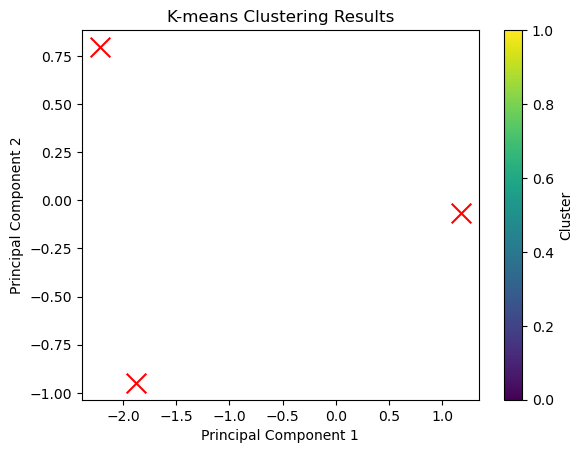

In [66]:
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200)

plt.title('K-means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()